In [1]:
import jax.numpy as jnp
import jax.random as jran

import haiku as hk


import jaxgeometry
import ManLearn
from ManLearn import train_MNIST
from ManLearn import model_loader

2024-02-29 13:20:48.669468: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


## Load Data

In [2]:
rng_key = jran.PRNGKey(2712)

In [3]:
train_dataset = train_MNIST.load_dataset(split = "train", 
                                 batch_size = 100, 
                                 seed = 2712)

2024-02-29 13:20:50.621200: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Loading Model

In [4]:
#typing
from typing import NamedTuple
import optax
from jax import Array, tree_flatten, tree_unflatten
class TrainingState(NamedTuple):
    params: hk.Params
    state_val:dict
    opt_state: optax.OptState
    rng_key: Array

/tmp/ipykernel_211499/3238189426.py:4: DeprecationWarning: jax.tree_flatten is deprecated: use jax.tree_util.tree_flatten.
  from jax import Array, tree_flatten, tree_unflatten
/tmp/ipykernel_211499/3238189426.py:4: DeprecationWarning: jax.tree_unflatten is deprecated: use jax.tree_util.tree_unflatten.
  from jax import Array, tree_flatten, tree_unflatten


In [5]:
import os
import pickle
def load_model_fn(ckpt_dir, epoch):
    
    file_name = os.path.join(ckpt_dir, "epoch_{}_tree.pkl".format(epoch))
    with open(file_name, "rb") as f:
        tree_struct = pickle.load(f)
        
    leaves, treedef = tree_flatten(tree_struct)
    file_name = os.path.join(ckpt_dir, "epoch_{}_arrays.npy".format(epoch))
    with open(file_name, "rb") as f:
        flat_state = [np.load(f) for _ in leaves]


        return tree_unflatten(treedef, flat_state)

In [6]:
rng_key = jran.PRNGKey(2712)

model_encoder = ManLearn.VAE.VAE_MNIST.model_encoder
model_decoder = ManLearn.VAE.VAE_MNIST.model_decoder
model = ManLearn.VAE.VAE_MNIST.model

state = model_loader.load_model("ManLearn/models/MNIST/VAE/")
print(state.params.keys())
print(len(state.params.keys()))

dict_keys(['decoder/batch_norm', 'decoder/batch_norm_1', 'decoder/batch_norm_2', 'decoder/conv2_d_transpose', 'decoder/conv2_d_transpose_1', 'decoder/conv2_d_transpose_2', 'decoder/linear', 'decoder/linear_1', 'decoder/linear_2', 'encoder/batch_norm', 'encoder/batch_norm_1', 'encoder/batch_norm_2', 'encoder/batch_norm_3', 'encoder/conv2_d', 'encoder/conv2_d_1', 'encoder/conv2_d_2', 'encoder/linear', 'encoder/linear_1', 'encoder/linear_2'])
19


In [18]:
from ManLearn.VAE import VAE2_MNIST
model2 = VAE2_MNIST.model
model_decoder2 = VAE2_MNIST.model_decoder
initial_params = model2.init(rng_key, next(train_dataset[0]).image)
print(initial_params.keys())
print(len(initial_params.keys()))
initial_params.update(state.params)

dict_keys(['encoder/conv2_d', 'encoder/conv2_d_1', 'encoder/conv2_d_2', 'encoder/linear', 'encoder/linear_1', 'encoder/linear_2', 'decoder/linear', 'decoder/linear_1', 'decoder/conv2_d_transpose', 'decoder/conv2_d_transpose_1', 'decoder/conv2_d_transpose_2', 'decoder/linear_2'])
12


In [15]:
model2.decoder(jnp.ones((1,2)))

AttributeError: 'Transformed' object has no attribute 'decoder'

In [13]:
state.params['encoder/conv2_d']

{'w': array([[[[-0.21354052,  0.06135603, -0.39106044, ..., -0.20208754,
           -0.08029794, -0.07346983]],
 
         [[-0.01404703, -0.05768723, -0.11307259, ...,  0.19360858,
            0.18072474, -0.06466629]],
 
         [[ 0.1747347 , -0.06417012,  0.06991654, ...,  0.15199405,
           -0.06627957,  0.20038699]],
 
         [[ 0.29134095, -0.23965575, -0.16902058, ...,  0.13458219,
           -0.05604921,  0.25392926]]],
 
 
        [[[ 0.16781488,  0.07799585, -0.23223794, ..., -0.27061594,
           -0.2733124 , -0.00678509]],
 
         [[ 0.31294662,  0.33728725, -0.05942586, ..., -0.16697396,
           -0.38223705,  0.04754156]],
 
         [[-0.19997004,  0.00412941,  0.04136116, ..., -0.26388547,
           -0.21736181, -0.33713973]],
 
         [[ 0.28335246,  0.02212178, -0.12015286, ...,  0.11203959,
           -0.16619442,  0.04410643]]],
 
 
        [[[-0.26313606, -0.14557536, -0.42423832, ..., -0.3185617 ,
            0.20377828,  0.29000506]],
 
        

In [14]:
initial_params['encoder/conv2_d']

{'w': array([[[[-0.21354052,  0.06135603, -0.39106044, ..., -0.20208754,
           -0.08029794, -0.07346983]],
 
         [[-0.01404703, -0.05768723, -0.11307259, ...,  0.19360858,
            0.18072474, -0.06466629]],
 
         [[ 0.1747347 , -0.06417012,  0.06991654, ...,  0.15199405,
           -0.06627957,  0.20038699]],
 
         [[ 0.29134095, -0.23965575, -0.16902058, ...,  0.13458219,
           -0.05604921,  0.25392926]]],
 
 
        [[[ 0.16781488,  0.07799585, -0.23223794, ..., -0.27061594,
           -0.2733124 , -0.00678509]],
 
         [[ 0.31294662,  0.33728725, -0.05942586, ..., -0.16697396,
           -0.38223705,  0.04754156]],
 
         [[-0.19997004,  0.00412941,  0.04136116, ..., -0.26388547,
           -0.21736181, -0.33713973]],
 
         [[ 0.28335246,  0.02212178, -0.12015286, ...,  0.11203959,
           -0.16619442,  0.04410643]]],
 
 
        [[[-0.26313606, -0.14557536, -0.42423832, ..., -0.3185617 ,
            0.20377828,  0.29000506]],
 
        

In [22]:
F = lambda z: model2.decoder.apply(state.params, rng_key, z[0].reshape(-1,2))[0].reshape(-1)

In [23]:
F((jnp.ones(2), jnp.zeros(1))).shape

AttributeError: 'Transformed' object has no attribute 'decoder'

In [21]:
state.params.keys()

dict_keys(['decoder/batch_norm', 'decoder/batch_norm_1', 'decoder/batch_norm_2', 'decoder/conv2_d_transpose', 'decoder/conv2_d_transpose_1', 'decoder/conv2_d_transpose_2', 'decoder/linear', 'decoder/linear_1', 'decoder/linear_2', 'encoder/batch_norm', 'encoder/batch_norm_1', 'encoder/batch_norm_2', 'encoder/batch_norm_3', 'encoder/conv2_d', 'encoder/conv2_d_1', 'encoder/conv2_d_2', 'encoder/linear', 'encoder/linear_1', 'encoder/linear_2'])

## Defining Manifold

In [9]:
F = lambda z: model_decoder.apply(state.params, rng_key, z[0].reshape(-1,10))[0].reshape(-1)
F_inv = lambda x: model_encoder.apply(state.params, rng_key, x[1].reshape(-1,28,28,1))[0]

In [10]:
M = Latent(F=F,dim=10,emb_dim=28*28, invF=None)

metric.initialize(M)
geodesic.initialize(M)
Brownian_coords.initialize(M)
Log.initialize(M)

(product,sde_product,chart_update_product) = product_sde.initialize(M,M.sde_Brownian_coords,M.chart_update_Brownian_coords)

diffusion_mean.initialize(M)
diagonal_conditioning.initialize(M,sde_product,chart_update_product)

x0 = M.coords([0.]*10)
T = 0.5

using M.Exp for Logarithm


## Plot Reconstruction

In [11]:
img = next(train_dataset).image
img_learned = model.apply(state.params, rng_key, img).image

In [12]:
#img2 = img/255
#img_learned *= 1/255

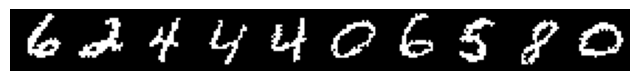

In [13]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(8, 8))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 10),  # creates 2x2 grid of axes
                 axes_pad=0.0,  # pad between axes in inch.
                 )
for ax, im in zip(grid, img[:10]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap='gray')
    ax.set_axis_off()

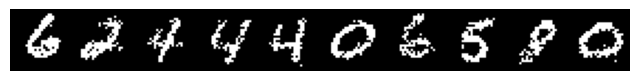

In [14]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(8, 8))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 10),  # creates 2x2 grid of axes
                 axes_pad=0.0,  # pad between axes in inch.
                 )
for ax, im in zip(grid, img_learned[:10]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap='gray')
    ax.set_axis_off()

## Loading Model

In [15]:
#Load models
def net_f(x):
    """Create model."""
    x_new = x.T
    x1 = x_new[:M.dim].T
    x2 = x_new[M.dim:(2*M.dim)].T
    t = x_new[-1]
    if x1.ndim == 2:
        t = t.reshape(-1,1)
    model = hk.Sequential([
        hk.Linear(400), tanh,
        hk.Linear(200), tanh,
        hk.Linear(100), tanh,
        hk.Linear(50), tanh,
        lambda x: hk.Linear(M.dim)(x)+(x1-x2)/t
    ])

    #key = subkey4

    y = model(x)

    return y
        
model_mean = hk.without_apply_rng(hk.transform(net_f))

state_mean = st.load_model_fn("trained_models/MNIST/diffusion_mean/", 250)


In [16]:
def grady_log_model(x,y,t):
    
    return model_mean.apply(state_mean.params,jnp.hstack((x[0], y[0], t)))

In [17]:
def gradt_log_model(x,y,t):
    
    grad_val = grady_log_model(x, y, t)
            
    return 0.5*(jnp.dot(grad_val, grad_val)+M.div(y,lambda y: grady_log_model(x, y, t)))